In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

from utils.gpu_memory import limited_gpu_memory

In [2]:
limited_gpu_memory()

memory growth: True


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# データセットの形状確認
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


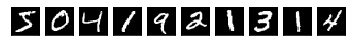

In [5]:
# データセットの画像確認
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i], 'gray')
    plt.yticks([])
    plt.xticks([])

plt.show()

In [6]:
# データセットのラベル確認
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
# データセット画像の前処理
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [8]:
# データセットラベルの前処理
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [9]:
# モデルの作成
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['acc'])

In [11]:
history = model.fit(train_images, train_labels, batch_size=500, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 29us/sample - loss: 1.7301 - acc: 0.4337 - val_loss: 1.0119 - val_acc: 0.8409
Epoch 2/5
48000/48000 [==============================] - 0s 7us/sample - loss: 0.9403 - acc: 0.7408 - val_loss: 0.5840 - val_acc: 0.8816
Epoch 3/5
48000/48000 [==============================] - 0s 7us/sample - loss: 0.6611 - acc: 0.8208 - val_loss: 0.4297 - val_acc: 0.9007
Epoch 4/5
48000/48000 [==============================] - 0s 6us/sample - loss: 0.5394 - acc: 0.8534 - val_loss: 0.3628 - val_acc: 0.9062
Epoch 5/5
48000/48000 [==============================] - 0s 7us/sample - loss: 0.4734 - acc: 0.8715 - val_loss: 0.3219 - val_acc: 0.9157


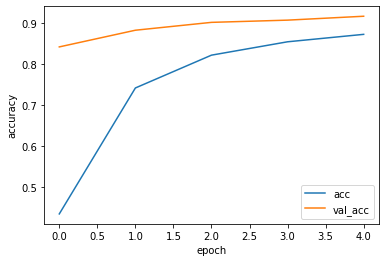

In [12]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [13]:
# テストデータを使ってモデルを評価する
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.4f}\nacc: {:.4f}'.format(test_loss, test_acc))

10000/10000 [==============================] - 1s 106us/sample - loss: 0.3265 - acc: 0.9151
loss: 0.3265
acc: 0.9151


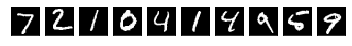

[7 2 1 0 4 1 4 9 6 9]


In [14]:
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), 'gray')
    plt.yticks([])
    plt.xticks([])

plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)